In [ ]:
# https://github.com/611noorsaeed/E-Commerece-Recommendation-System-Machine-Learning-Product-Recommendation-system-/tree/main

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

import os
from scipy.sparse import coo_matrix

Step 1: Data Loading and Preprocessing

A TSV (Tab Separated Values) file is a simple text format for storing tabular data, such as numbers and text. Each record in the file represents a single row in the table, with fields separated by tabs.

In [2]:
# Read your dataset (replace 'marketing_sample_for_walmart_com-walmart_com_product_review__20200701_20201231__5k_data.tsv' with your dataset path)
train_data = pd.read_csv('../artifacts/csv/walmartdata.tsv', sep='\t')
train_data.columns

Index(['Uniq Id', 'Crawl Timestamp', 'Dataset Origin', 'Product Id',
       'Product Barcode', 'Product Company Type Source',
       'Product Brand Source', 'Product Brand Normalised Source',
       'Product Name Source', 'Match Rank', 'Match Score', 'Match Type',
       'Retailer', 'Product Category', 'Product Brand', 'Product Name',
       'Product Price', 'Sku', 'Upc', 'Product Url', 'Market',
       'Product Description', 'Product Currency',
       'Product Available Inventory', 'Product Image Url',
       'Product Model Number', 'Product Tags', 'Product Contents',
       'Product Rating', 'Product Reviews Count', 'Bsr', 'Joining Key'],
      dtype='object')

In [3]:
train_data.head()

,Uniq Id,Crawl Timestamp,Dataset Origin,Product Id,Product Barcode,Product Company Type Source,Product Brand Source,Product Brand Normalised Source,Product Name Source,Match Rank,...,Product Currency,Product Available Inventory,Product Image Url,Product Model Number,Product Tags,Product Contents,Product Rating,Product Reviews Count,Bsr,Joining Key
0,1705736792d82aa2f2d3caf1c07c53f4,2020-09-24 03:21:12 +0000,NaN,2e17bf4acecdece67fc00f07ad62c910,NaN,Competitor,NaN,NaN,NaN,NaN,...,USD,111111111,https://i5.walmartimages.com/asr/0e1f4c51-c1a4...,NaN,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",NaN,NaN,NaN,NaN,81350af1be98d3753cf964709f0c766a
1,95a9fe6f4810fcfc7ff244fd06784f11,2020-10-30 14:04:08 +0000,NaN,076e5854a62dd283c253d6bae415af1f,NaN,Competitor,NaN,NaN,NaN,NaN,...,USD,111111111,https://i5.walmartimages.com/asr/9c8e42e4-13a5...,NaN,"Nice 'n Easy Permanent Color, 111 Natural Medi...",NaN,NaN,NaN,NaN,0353e63907dc0de0c734db4690300057
2,8d4d0330178d3ed181b15a4102b287f2,2020-08-06 05:51:47 +0000,NaN,8a4fe5d9c7a6ed26cc44d785a454b124,NaN,Competitor,NaN,NaN,NaN,NaN,...,USD,111111111,https://i5.walmartimages.com/asr/e3a601c2-6a2b...,NaN,Clairol Nice 'N Easy Permanent Color 7/106A Na...,NaN,4.5,29221.0,NaN,b6985c8e94815fbca2319dbb8bf228af
3,fddc4df45b35efd886794b261f730c51,2020-07-15 11:22:04 +0000,NaN,03b5fb878a33eadff8b033419eab9669,NaN,Competitor,NaN,NaN,NaN,NaN,...,USD,111111111,https://i5.walmartimages.com/asr/25b4b467-bc61...,NaN,"Kokie Professional Matte Lipstick, Hot Berry, ...",NaN,NaN,NaN,NaN,85b70fded09186f00467cea2f935b779
4,0990cf89a59ca6a0460349a3e4f51d42,2020-11-26T12:27:20+00:00,NaN,ce3d761e57d6ccad80619297b5b1bcbc,NaN,Competitor,NaN,NaN,NaN,NaN,...,USD,111111111,https://i5.walmartimages.com/asr/1a2ebb06-cd01...,NaN,"Gillette TRAC II Plus Razor Blade Refills, Fit...",NaN,NaN,131.0,NaN,41c870871328e97da6fb036bb7d4b2da


In [4]:
train_data = train_data[['Uniq Id','Product Id', 'Product Rating', 'Product Reviews Count', 'Product Category', 'Product Brand', 'Product Name', 'Product Image Url', 'Product Description', 'Product Tags']]
train_data.head(3)

,Uniq Id,Product Id,Product Rating,Product Reviews Count,Product Category,Product Brand,Product Name,Product Image Url,Product Description,Product Tags
0,1705736792d82aa2f2d3caf1c07c53f4,2e17bf4acecdece67fc00f07ad62c910,NaN,NaN,Premium Beauty > Premium Makeup > Premium Nail...,OPI,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",https://i5.walmartimages.com/asr/0e1f4c51-c1a4...,NaN,"OPI Infinite Shine, Nail Lacquer Nail Polish, ..."
1,95a9fe6f4810fcfc7ff244fd06784f11,076e5854a62dd283c253d6bae415af1f,NaN,NaN,Beauty > Hair Care > Hair Color > Auburn Hair ...,Nice'n Easy,"Nice n Easy Permanent Color, 111 Natural Mediu...",https://i5.walmartimages.com/asr/9c8e42e4-13a5...,Pack of 3 Pack of 3 for the UPC: 381519000201 ...,"Nice 'n Easy Permanent Color, 111 Natural Medi..."
2,8d4d0330178d3ed181b15a4102b287f2,8a4fe5d9c7a6ed26cc44d785a454b124,4.5,29221.0,Beauty > Hair Care > Hair Color > Permanent Ha...,Clairol,Clairol Nice N Easy Permanent Color 7/106A Nat...,https://i5.walmartimages.com/asr/e3a601c2-6a2b...,This Clairol Nice N Easy Permanent Color gives...,Clairol Nice 'N Easy Permanent Color 7/106A Na...


Basic Operations

In [5]:
train_data['Product Tags']

0       OPI Infinite Shine, Nail Lacquer Nail Polish, ...
1       Nice 'n Easy Permanent Color, 111 Natural Medi...
2       Clairol Nice 'N Easy Permanent Color 7/106A Na...
3       Kokie Professional Matte Lipstick, Hot Berry, ...
4       Gillette TRAC II Plus Razor Blade Refills, Fit...
                              ...                        
4995    Garden Mint Room Spray (Double Strength), 4 ou...
4996    Garnier Nutrisse Nourishing Hair Color Creme (...
4997    Nail File Electric Drill, 6 in 1 Professional ...
4998    Creed Love In Black Hair And Body Wash 6.8oz/2...
4999                    Foundation, Wal-mart, Walmart.com
Name: Product Tags, Length: 5000, dtype: object

In [6]:
train_data.shape

(5000, 10)

In [7]:
train_data.isna().sum()

Uniq Id                     0
Product Id                  0
Product Rating           2806
Product Reviews Count    1654
Product Category           10
Product Brand              13
Product Name                0
Product Image Url           0
Product Description      1127
Product Tags                0
dtype: int64

In [8]:
train_data.isnull().sum()

Uniq Id                     0
Product Id                  0
Product Rating           2806
Product Reviews Count    1654
Product Category           10
Product Brand              13
Product Name                0
Product Image Url           0
Product Description      1127
Product Tags                0
dtype: int64

In [9]:
# Fill missing values in 'Product Rating' with a default value (e.g., 0)
train_data['Product Rating'].fillna(0, inplace=True)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_15320\4041364375.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Product Rating'].fillna(0, inplace=True)


In [10]:
# Fill missing values in 'Product Reviews Count' with a default value (e.g., 0)
train_data['Product Reviews Count'].fillna(0, inplace=True)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_15320\954635322.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Product Reviews Count'].fillna(0, inplace=True)


In [11]:
# Fill missing values in 'Product Category' with a default value (e.g., 'Unknown')
train_data['Product Category'].fillna('', inplace=True)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_15320\2641505201.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Product Category'].fillna('', inplace=True)


In [12]:
# Fill missing values in 'Product Brand' with a default value (e.g., 'Unknown')
train_data['Product Brand'].fillna('', inplace=True)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_15320\1837374842.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Product Brand'].fillna('', inplace=True)


In [13]:
# Fill missing values in 'Product Description' with an empty string
train_data['Product Description'].fillna('', inplace=True)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_15320\2979470128.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Product Description'].fillna('', inplace=True)


In [14]:
train_data.isnull().sum()

Uniq Id                  0
Product Id               0
Product Rating           0
Product Reviews Count    0
Product Category         0
Product Brand            0
Product Name             0
Product Image Url        0
Product Description      0
Product Tags             0
dtype: int64

In [15]:
train_data.duplicated().sum()

np.int64(0)

In [16]:
# make columns shorter
# Define the mapping of current column names to shorter names
column_name_mapping = {
    'Uniq Id': 'ID',
    'Product Id': 'ProdID',
    'Product Rating': 'Rating',
    'Product Reviews Count': 'ReviewCount',
    'Product Category': 'Category',
    'Product Brand': 'Brand',
    'Product Name': 'Name',
    'Product Image Url': 'ImageURL',
    'Product Description': 'Description',
    'Product Tags': 'Tags',
    'Product Contents': 'Contents'
}

In [17]:
# Rename the columns using the mapping
train_data.rename(columns=column_name_mapping, inplace=True)

In [18]:
train_data.head()

,ID,ProdID,Rating,ReviewCount,Category,Brand,Name,ImageURL,Description,Tags
0,1705736792d82aa2f2d3caf1c07c53f4,2e17bf4acecdece67fc00f07ad62c910,0.0,0.0,Premium Beauty > Premium Makeup > Premium Nail...,OPI,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",https://i5.walmartimages.com/asr/0e1f4c51-c1a4...,,"OPI Infinite Shine, Nail Lacquer Nail Polish, ..."
1,95a9fe6f4810fcfc7ff244fd06784f11,076e5854a62dd283c253d6bae415af1f,0.0,0.0,Beauty > Hair Care > Hair Color > Auburn Hair ...,Nice'n Easy,"Nice n Easy Permanent Color, 111 Natural Mediu...",https://i5.walmartimages.com/asr/9c8e42e4-13a5...,Pack of 3 Pack of 3 for the UPC: 381519000201 ...,"Nice 'n Easy Permanent Color, 111 Natural Medi..."
2,8d4d0330178d3ed181b15a4102b287f2,8a4fe5d9c7a6ed26cc44d785a454b124,4.5,29221.0,Beauty > Hair Care > Hair Color > Permanent Ha...,Clairol,Clairol Nice N Easy Permanent Color 7/106A Nat...,https://i5.walmartimages.com/asr/e3a601c2-6a2b...,This Clairol Nice N Easy Permanent Color gives...,Clairol Nice 'N Easy Permanent Color 7/106A Na...
3,fddc4df45b35efd886794b261f730c51,03b5fb878a33eadff8b033419eab9669,0.0,0.0,Beauty > Makeup > Lip,Kokie Cosmetics,"Kokie Professional Matte Lipstick, Hot Berry, ...",https://i5.walmartimages.com/asr/25b4b467-bc61...,Calling all matte lip lovers! Indulge in our r...,"Kokie Professional Matte Lipstick, Hot Berry, ..."
4,0990cf89a59ca6a0460349a3e4f51d42,ce3d761e57d6ccad80619297b5b1bcbc,0.0,131.0,Seasonal > Stock Up Essentials > Personal Care...,Gillette,"Gillette TRAC II Plus Razor Blade Refills, Fit...",https://i5.walmartimages.com/asr/1a2ebb06-cd01...,"In 1971, Gillette introduced the Trac II razor...","Gillette TRAC II Plus Razor Blade Refills, Fit..."


The code str.extract(r'(\d+)') is a pandas function used to extract digits from a string column in a DataFrame.
Here's a breakdown of how it works:
str refers to the string accessor for pandas Series.
extract is a function that extracts groups from a string using regular expressions.
r'(\d+)' is the regular expression pattern used for extraction.
r prefix denotes a raw string literal, which treats backslashes as literal characters rather than escape characters.
(\d+) is the capture group, which matches one or more digits (\d+).
\d matches any digit (equivalent to [0-9]).
+ matches one or more occurrences of the preceding element.

In [19]:
train_data['ID'] = train_data['ID'].str.extract(r'(\d+)').astype(float)

In [20]:
train_data['ID']

0       1.705737e+09
1       9.500000e+01
2       8.000000e+00
3       4.000000e+00
4       9.900000e+02
            ...     
4995    2.771000e+03
4996    0.000000e+00
4997    3.400000e+01
4998    9.000000e+00
4999    0.000000e+00
Name: ID, Length: 5000, dtype: float64

In [21]:
train_data['ProdID'] = train_data['ProdID'].str.extract(r'(\d+)').astype(float)

In [22]:
train_data['ProdID']

0         2.0
1        76.0
2         8.0
3         3.0
4         3.0
        ...  
4995    208.0
4996      1.0
4997     96.0
4998      7.0
4999      1.0
Name: ProdID, Length: 5000, dtype: float64

Step 2: EDA (Exploratory Data Analysis)

In [23]:
# Basic statistics
num_users = train_data['ID'].nunique()
num_items = train_data['ProdID'].nunique()
num_ratings = train_data['Rating'].nunique()
print(f"Number of unique users: {num_users}")
print(f"Number of unique items: {num_items}")
print(f"Number of unique ratings: {num_ratings}")

Number of unique users: 1721
Number of unique items: 1697
Number of unique ratings: 36


In [24]:
train_data['Rating'].unique()

array([0. , 4.5, 4.6, 4.3, 5. , 3.8, 4.1, 4.2, 3.7, 4.4, 4.8, 4. , 4.7,
       4.9, 2. , 3.9, 3. , 3.4, 3.1, 2.8, 3.2, 3.5, 2.6, 3.3, 2.7, 1. ,
       3.6, 2.3, 2.1, 2.5, 2.9, 1.3, 2.2, 1.5, 1.8, 2.4])

In [25]:
# Pivot the DataFrame to create a heatmap
heatmap_data = train_data.pivot_table('ID', 'Rating') # idnex , values

In [26]:
heatmap_data = train_data.pivot_table(index='ID', values='Rating') # idnex , values

In [27]:
heatmap_data

,Rating
ID,
0.000000e+00,1.856373
1.000000e+00,1.957143
2.000000e+00,1.548165
3.000000e+00,1.724873
4.000000e+00,1.798462
...,...
9.967409e+13,5.000000
6.094514e+14,0.000000
3.007694e+17,4.800000


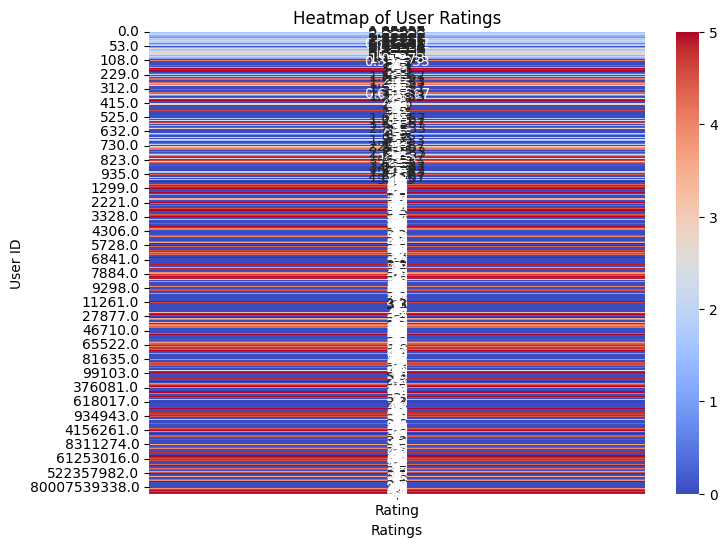

In [28]:
# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, fmt='g', cmap='coolwarm', cbar=True)
plt.title('Heatmap of User Ratings')
plt.xlabel('Ratings')
plt.ylabel('User ID')
plt.show()

In [29]:
train_data['ID'].nunique()

1721

In [30]:
train_data['ID'].value_counts()

ID
7.0        224
2.0        218
6.0        214
8.0        206
0.0        204
          ... 
239.0        1
5599.0       1
1855.0       1
62906.0      1
33471.0      1
Name: count, Length: 1721, dtype: int64

Text(0.5, 1.0, 'Distribution of Interactions per User')

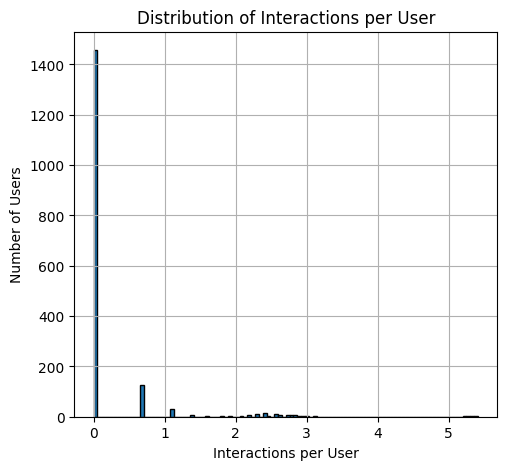

In [31]:
# Distribution of interactions
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
np.log(train_data['ID'].value_counts()).hist(bins=100, edgecolor='k')
plt.xlabel('Interactions per User')
plt.ylabel('Number of Users')
plt.title('Distribution of Interactions per User')

In [32]:
train_data['ProdID'].value_counts()

ProdID
3.000000e+00    214
9.000000e+00    204
1.000000e+00    200
5.000000e+00    199
0.000000e+00    196
               ... 
7.408282e+09      1
8.530000e+02      1
7.398600e+04      1
9.176134e+06      1
5.956000e+03      1
Name: count, Length: 1697, dtype: int64

In [33]:
np.log(train_data['ProdID'].value_counts())

ProdID
3.000000e+00    5.365976
9.000000e+00    5.318120
1.000000e+00    5.298317
5.000000e+00    5.293305
0.000000e+00    5.278115
                  ...   
7.408282e+09    0.000000
8.530000e+02    0.000000
7.398600e+04    0.000000
9.176134e+06    0.000000
5.956000e+03    0.000000
Name: count, Length: 1697, dtype: float64

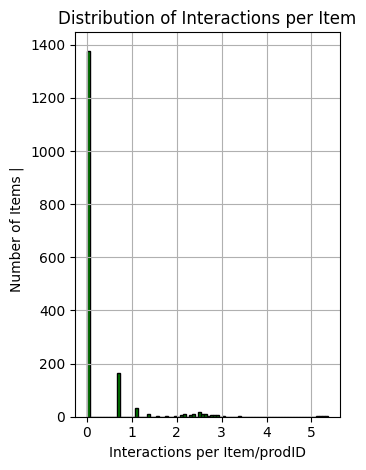

In [34]:
plt.subplot(1, 2, 2)
np.log(train_data['ProdID'].value_counts()).hist(bins=80, edgecolor='k',color='green')
plt.xlabel('Interactions per Item/prodID')
plt.ylabel('Number of Items |  ')
plt.title('Distribution of Interactions per Item')

plt.tight_layout()
plt.show()

In [35]:
train_data['ProdID'].value_counts().head(5)

ProdID
3.0    214
9.0    204
1.0    200
5.0    199
0.0    196
Name: count, dtype: int64

Text(0.5, 1.0, 'Most Popular items')

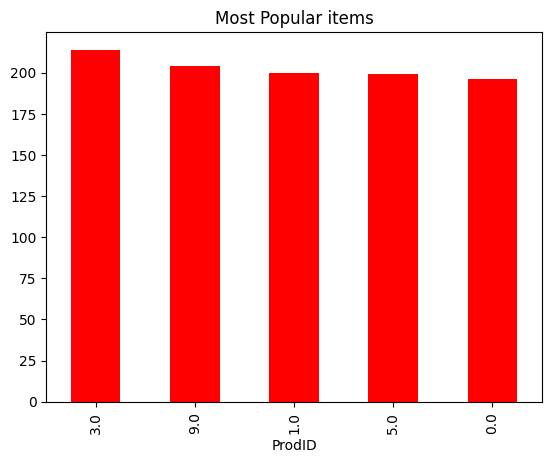

In [36]:
# Most popular items
popular_items = train_data['ProdID'].value_counts().head(5)
popular_items.plot(kind='bar',color='red')
plt.title("Most Popular items")

In [37]:
train_data['Rating'].value_counts()

Rating
0.0    2806
5.0     453
4.6     192
4.5     176
4.4     162
4.0     138
4.7     138
4.8     134
4.3     131
4.2     124
3.0      65
4.1      62
4.9      53
3.9      48
3.7      46
3.8      46
1.0      45
3.5      43
3.6      30
3.3      19
2.0      18
3.4      14
3.2      10
3.1       7
2.7       7
2.3       6
2.9       5
2.6       4
2.4       4
2.2       3
2.5       3
2.8       2
1.5       2
1.8       2
1.3       1
2.1       1
Name: count, dtype: int64

<Axes: xlabel='Rating'>

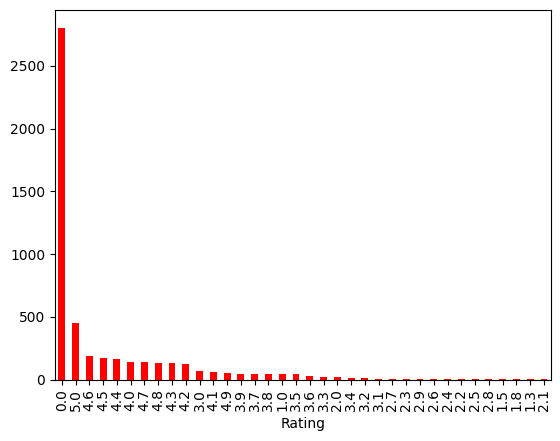

In [38]:
# most rated counts
train_data['Rating'].value_counts().plot(kind='bar',color='red')


The np.log() function in NumPy calculates the natural logarithm of a number, which is the logarithm to the base e (approximately 2.71828).

In [39]:
np.log(train_data['Rating'].value_counts())

Rating
0.0    7.939515
5.0    6.115892
4.6    5.257495
4.5    5.170484
4.4    5.087596
4.0    4.927254
4.7    4.927254
4.8    4.897840
4.3    4.875197
4.2    4.820282
3.0    4.174387
4.1    4.127134
4.9    3.970292
3.9    3.871201
3.7    3.828641
3.8    3.828641
1.0    3.806662
3.5    3.761200
3.6    3.401197
3.3    2.944439
2.0    2.890372
3.4    2.639057
3.2    2.302585
3.1    1.945910
2.7    1.945910
2.3    1.791759
2.9    1.609438
2.6    1.386294
2.4    1.386294
2.2    1.098612
2.5    1.098612
2.8    0.693147
1.5    0.693147
1.8    0.693147
1.3    0.000000
2.1    0.000000
Name: count, dtype: float64

In [40]:
np.power(2.71828,6.2)

np.float64(492.7469861138544)

Text(0, 0.5, 'Log Count | power of e')

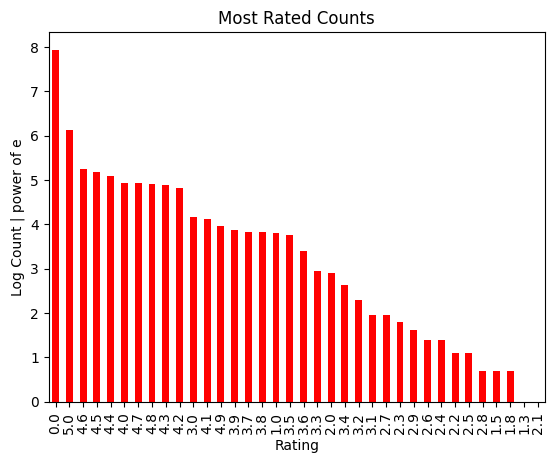

In [41]:
# most rated counts
np.log(train_data['Rating'].value_counts()).plot(kind='bar',color='red')
plt.title('Most Rated Counts')
plt.xlabel('Rating')
plt.ylabel('Log Count | power of e')

Step 3: Data Cleaning and Tags Creations

In [42]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

nlp = spacy.load("en_core_web_sm")

def clean_and_extract_tags(text):
    doc = nlp(text.lower())
    tags = [token.text for token in doc if token.text.isalnum() and token.text not in STOP_WORDS]
    return ', '.join(tags)


# This function, clean_and_extract_tags, takes a string input text, processes it using the Natural Language Processing (NLP) library spaCy, and returns a string of extracted tags.
# Here's a step-by-step breakdown:
# Text Preprocessing: text.lower()
# Converts the input text to lowercase to ensure the function is case-insensitive.
# spaCy Processing: doc = nlp(text.lower())
# Passes the preprocessed text to the spaCy NLP model (nlp) to perform tokenization, entity recognition, and other linguistic analyses.
# The resulting doc object contains a sequence of Token objects, each representing a word or subword in the text.
# Tag Extraction: tags = [token.text for token in doc if token.text.isalnum() and token.text not in STOP_WORDS]
# Iterates over each Token object in the doc sequence.
# Applies two filters to each token:
# token.text.isalnum(): Only considers tokens consisting entirely of alphanumeric characters (letters and numbers).
# token.text not in STOP_WORDS: Excludes tokens that are common "stop words" (e.g., "the", "and", "a") that do not carry significant meaning.


In [43]:
train_data[['Category', 'Brand', 'Description']].head()

,Category,Brand,Description
0,Premium Beauty > Premium Makeup > Premium Nail...,OPI,
1,Beauty > Hair Care > Hair Color > Auburn Hair ...,Nice'n Easy,Pack of 3 Pack of 3 for the UPC: 381519000201 ...
2,Beauty > Hair Care > Hair Color > Permanent Ha...,Clairol,This Clairol Nice N Easy Permanent Color gives...
3,Beauty > Makeup > Lip,Kokie Cosmetics,Calling all matte lip lovers! Indulge in our r...
4,Seasonal > Stock Up Essentials > Personal Care...,Gillette,"In 1971, Gillette introduced the Trac II razor..."


In [44]:
columns_to_extract_tags_from = ['Category', 'Brand', 'Description']

for column in columns_to_extract_tags_from:
    train_data[column] = train_data[column].apply(clean_and_extract_tags)

In [45]:
# Concatenate the cleaned tags from all relevant columns
train_data['Tags'] = train_data[columns_to_extract_tags_from].apply(lambda row: ', '.join(row), axis=1)

In [46]:
train_data['Tags'].head()

0    premium, beauty, premium, makeup, premium, nai...
1    beauty, hair, care, hair, color, auburn, hair,...
2    beauty, hair, care, hair, color, permanent, ha...
3    beauty, makeup, lip, kokie, cosmetics, calling...
4    seasonal, stock, essentials, personal, care, s...
Name: Tags, dtype: object

Rating Base Recommendations System

In [47]:
train_data.groupby(['Name','ReviewCount','Brand','ImageURL'])['Rating'].mean()

Name                                                                                                                ReviewCount  Brand                 ImageURL                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       
$6 Mail-In Rebate Available Braun Epilator Silk-epil 3-270 with Bikini Trimmer an

##### Rating Base Recommendations System

In [48]:
average_ratings = train_data.groupby(['Name','ReviewCount','Brand','ImageURL'])['Rating'].mean().reset_index()

In [49]:
average_ratings.head()

,Name,ReviewCount,Brand,ImageURL,Rating
0,$6 Mail-In Rebate Available Braun Epilator Sil...,146.0,braun,https://i5.walmartimages.com/asr/c7d78838-e8e2...,4.5
1,($100 Value) Peter Thomas Roth Thermal Therapy...,1.0,"peter, thomas, roth",https://i5.walmartimages.com/asr/ecd851ef-6ca7...,5.0
2,($11 Value) Love Beauty and Planet Coconut Wat...,278.0,"love, beauty, planet",https://i5.walmartimages.com/asr/0348d82d-2a13...,0.0
3,($125 Value) Impressions Vanity Touch Pro LED ...,2.0,"impressions, vanity",https://i5.walmartimages.com/asr/b886b154-97fd...,2.5
4,($129 Value) CHI G2 Ceramic Titanium Infused H...,23.0,chi,https://i5.walmartimages.com/asr/9bcc0ed7-d62c...,4.4


In [50]:
top_rated_items = average_ratings.sort_values(by='Rating', ascending=False)

rating_base_recommendation = top_rated_items.head(10)

In [51]:
rating_base_recommendation

,Name,ReviewCount,Brand,ImageURL,Rating
1,($100 Value) Peter Thomas Roth Thermal Therapy...,1.0,"peter, thomas, roth",https://i5.walmartimages.com/asr/ecd851ef-6ca7...,5.0
4959,got2b Kinkier Curling Mousse 8 oz (Pack of 2),1.0,göt2b,https://i5.walmartimages.com/asr/9e656b95-79f6...,5.0
6,($14 Value) Burts Bees Beeswax Bounty Classic ...,10.0,"burt, bees",https://i5.walmartimages.com/asr/bfbb58dc-8199...,5.0
1208,Clairol Professional Beautiful Collection Semi...,1.0,clairol,https://i5.walmartimages.com/asr/31562542-b683...,5.0
1216,"Clairol Textures & Tones 4RC Cherrywood, 1 ea ...",1.0,clairol,https://i5.walmartimages.com/asr/78f33717-0104...,5.0
1228,Clay-Park Labs Ammonium Lactate Lotion 12% 14 ...,13.0,"clay, park, labs",https://i5.walmartimages.com/asr/b3d5462d-d067...,5.0
4857,"Yosoo Reusable Sanitary Pads with Wings, 9 Typ...",1.0,yosoo,https://i5.walmartimages.com/asr/5645ee43-e26f...,5.0
4862,ZINSSER & CO Jomax 1-Qt. Mold & Mildew Stain R...,1.0,jomax,https://i5.walmartimages.com/asr/d04c8d61-023a...,5.0
4892,"all Free Clear For Sensitive Skin, 110 Loads, ...",4.0,,https://i5.walmartimages.com/asr/9ccd3c7b-f479...,5.0
33,($55 Value) Clarins Multi-Active Day Face Crea...,2.0,clarins,https://i5.walmartimages.com/asr/894b62ab-76d2...,5.0


In [52]:
rating_base_recommendation['Rating'] = rating_base_recommendation['Rating'].astype(int)
rating_base_recommendation['ReviewCount'] = rating_base_recommendation['ReviewCount'].astype(int)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_15320\565725879.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rating_base_recommendation['Rating'] = rating_base_recommendation['Rating'].astype(int)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_15320\565725879.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rating_base_recommendation['ReviewCount'] = rating_base_recommendation['ReviewCount'].astype(int)


In [53]:
rating_base_recommendation

,Name,ReviewCount,Brand,ImageURL,Rating
1,($100 Value) Peter Thomas Roth Thermal Therapy...,1,"peter, thomas, roth",https://i5.walmartimages.com/asr/ecd851ef-6ca7...,5
4959,got2b Kinkier Curling Mousse 8 oz (Pack of 2),1,göt2b,https://i5.walmartimages.com/asr/9e656b95-79f6...,5
6,($14 Value) Burts Bees Beeswax Bounty Classic ...,10,"burt, bees",https://i5.walmartimages.com/asr/bfbb58dc-8199...,5
1208,Clairol Professional Beautiful Collection Semi...,1,clairol,https://i5.walmartimages.com/asr/31562542-b683...,5
1216,"Clairol Textures & Tones 4RC Cherrywood, 1 ea ...",1,clairol,https://i5.walmartimages.com/asr/78f33717-0104...,5
1228,Clay-Park Labs Ammonium Lactate Lotion 12% 14 ...,13,"clay, park, labs",https://i5.walmartimages.com/asr/b3d5462d-d067...,5
4857,"Yosoo Reusable Sanitary Pads with Wings, 9 Typ...",1,yosoo,https://i5.walmartimages.com/asr/5645ee43-e26f...,5
4862,ZINSSER & CO Jomax 1-Qt. Mold & Mildew Stain R...,1,jomax,https://i5.walmartimages.com/asr/d04c8d61-023a...,5
4892,"all Free Clear For Sensitive Skin, 110 Loads, ...",4,,https://i5.walmartimages.com/asr/9ccd3c7b-f479...,5
33,($55 Value) Clarins Multi-Active Day Face Crea...,2,clarins,https://i5.walmartimages.com/asr/894b62ab-76d2...,5


In [54]:
print("Rating Base Recommendation System: (Trending Products)")
rating_base_recommendation[['Name','Rating','ReviewCount','Brand','ImageURL']] = rating_base_recommendation[['Name','Rating','ReviewCount','Brand','ImageURL']]
rating_base_recommendation

Rating Base Recommendation System: (Trending Products)


C:\Users\lenovo\AppData\Local\Temp\ipykernel_15320\393183274.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rating_base_recommendation[['Name','Rating','ReviewCount','Brand','ImageURL']] = rating_base_recommendation[['Name','Rating','ReviewCount','Brand','ImageURL']]


,Name,ReviewCount,Brand,ImageURL,Rating
1,($100 Value) Peter Thomas Roth Thermal Therapy...,1,"peter, thomas, roth",https://i5.walmartimages.com/asr/ecd851ef-6ca7...,5
4959,got2b Kinkier Curling Mousse 8 oz (Pack of 2),1,göt2b,https://i5.walmartimages.com/asr/9e656b95-79f6...,5
6,($14 Value) Burts Bees Beeswax Bounty Classic ...,10,"burt, bees",https://i5.walmartimages.com/asr/bfbb58dc-8199...,5
1208,Clairol Professional Beautiful Collection Semi...,1,clairol,https://i5.walmartimages.com/asr/31562542-b683...,5
1216,"Clairol Textures & Tones 4RC Cherrywood, 1 ea ...",1,clairol,https://i5.walmartimages.com/asr/78f33717-0104...,5
1228,Clay-Park Labs Ammonium Lactate Lotion 12% 14 ...,13,"clay, park, labs",https://i5.walmartimages.com/asr/b3d5462d-d067...,5
4857,"Yosoo Reusable Sanitary Pads with Wings, 9 Typ...",1,yosoo,https://i5.walmartimages.com/asr/5645ee43-e26f...,5
4862,ZINSSER & CO Jomax 1-Qt. Mold & Mildew Stain R...,1,jomax,https://i5.walmartimages.com/asr/d04c8d61-023a...,5
4892,"all Free Clear For Sensitive Skin, 110 Loads, ...",4,,https://i5.walmartimages.com/asr/9ccd3c7b-f479...,5
33,($55 Value) Clarins Multi-Active Day Face Crea...,2,clarins,https://i5.walmartimages.com/asr/894b62ab-76d2...,5


#### Content Base Recommendation system (User Preferences or Items similarities)

In [55]:
# https://github.com/campusx-official/fashion-recommender-system
# https://www.youtube.com/watch?v=shtPVU5zXkM
# https://github.com/Dhruv-saxena-25/flipkart
# https://github.com/campusx-official/fashion-recommender-system

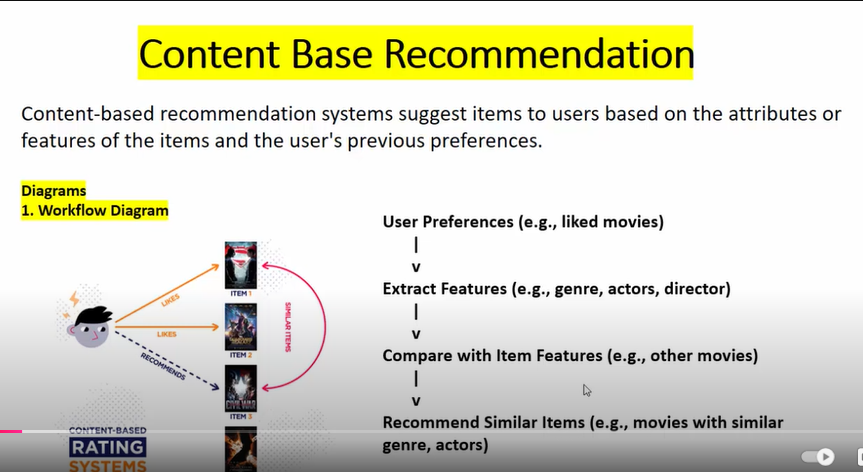

In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [57]:
train_data.head()

,ID,ProdID,Rating,ReviewCount,Category,Brand,Name,ImageURL,Description,Tags
0,1.705737e+09,2.0,0.0,0.0,"premium, beauty, premium, makeup, premium, nai...",opi,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",https://i5.walmartimages.com/asr/0e1f4c51-c1a4...,,"premium, beauty, premium, makeup, premium, nai..."
1,9.500000e+01,76.0,0.0,0.0,"beauty, hair, care, hair, color, auburn, hair,...",easy,"Nice n Easy Permanent Color, 111 Natural Mediu...",https://i5.walmartimages.com/asr/9c8e42e4-13a5...,"pack, 3, pack, 3, upc, 381519000201, beautiful...","beauty, hair, care, hair, color, auburn, hair,..."
2,8.000000e+00,8.0,4.5,29221.0,"beauty, hair, care, hair, color, permanent, ha...",clairol,Clairol Nice N Easy Permanent Color 7/106A Nat...,https://i5.walmartimages.com/asr/e3a601c2-6a2b...,"clairol, nice, n, easy, permanent, color, give...","beauty, hair, care, hair, color, permanent, ha..."
3,4.000000e+00,3.0,0.0,0.0,"beauty, makeup, lip","kokie, cosmetics","Kokie Professional Matte Lipstick, Hot Berry, ...",https://i5.walmartimages.com/asr/25b4b467-bc61...,"calling, matte, lip, lovers, indulge, rich, cr...","beauty, makeup, lip, kokie, cosmetics, calling..."
4,9.900000e+02,3.0,0.0,131.0,"seasonal, stock, essentials, personal, care, s...",gillette,"Gillette TRAC II Plus Razor Blade Refills, Fit...",https://i5.walmartimages.com/asr/1a2ebb06-cd01...,"1971, gillette, introduced, trac, ii, razor, s...","seasonal, stock, essentials, personal, care, s..."


In [58]:
train_data['Tags']

0       premium, beauty, premium, makeup, premium, nai...
1       beauty, hair, care, hair, color, auburn, hair,...
2       beauty, hair, care, hair, color, permanent, ha...
3       beauty, makeup, lip, kokie, cosmetics, calling...
4       seasonal, stock, essentials, personal, care, s...
                              ...                        
4995    household, essentials, air, fresheners, spray,...
4996    beauty, hair, care, hair, color, permanent, ha...
4997    beauty, makeup, nails, stoneway, multifunction...
4998    premium, beauty, premium, bath, body, premium,...
4999    beauty, makeup, face, makeup, face, makeup, br...
Name: Tags, Length: 5000, dtype: object

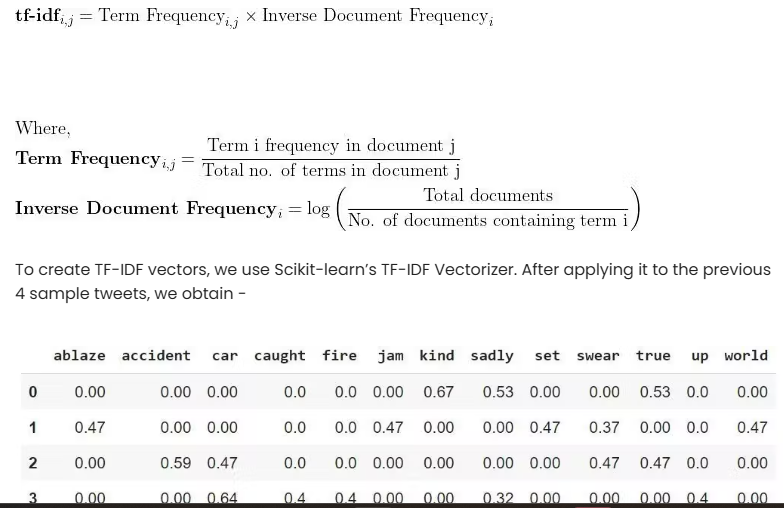

In [59]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix_content = tfidf_vectorizer.fit_transform(train_data['Tags'])
cosine_similarities_content = cosine_similarity(tfidf_matrix_content,tfidf_matrix_content)

In [60]:
tfidf_vectorizer

TfidfVectorizer(stop_words='english')

In [110]:
next(iter(tfidf_matrix_content.toarray()))

array([0., 0., 0., ..., 0., 0., 0.])

In [111]:
tfidf_matrix_content.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [62]:
cosine_similarities_content

array([[1.        , 0.00347577, 0.00363226, ..., 0.13535785, 0.31726435,
        0.05689108],
       [0.00347577, 1.        , 0.38086046, ..., 0.02315363, 0.00183907,
        0.0381051 ],
       [0.00363226, 0.38086046, 1.        , ..., 0.03960089, 0.00192187,
        0.0591094 ],
       ...,
       [0.13535785, 0.02315363, 0.03960089, ..., 1.        , 0.00123005,
        0.0379399 ],
       [0.31726435, 0.00183907, 0.00192187, ..., 0.00123005, 1.        ,
        0.00544407],
       [0.05689108, 0.0381051 , 0.0591094 , ..., 0.0379399 , 0.00544407,
        1.        ]])

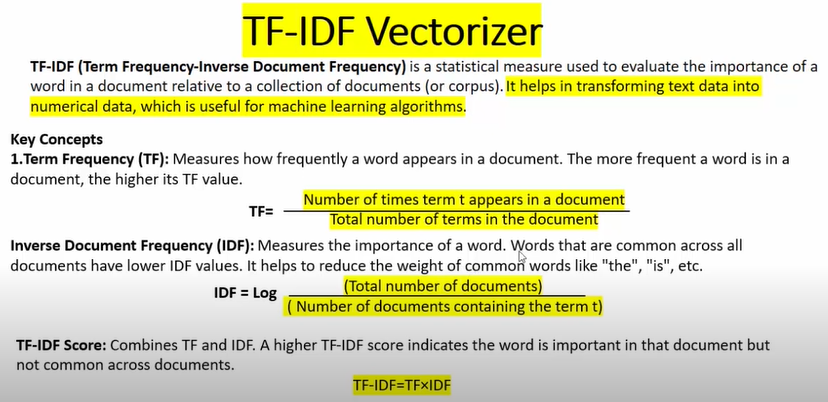

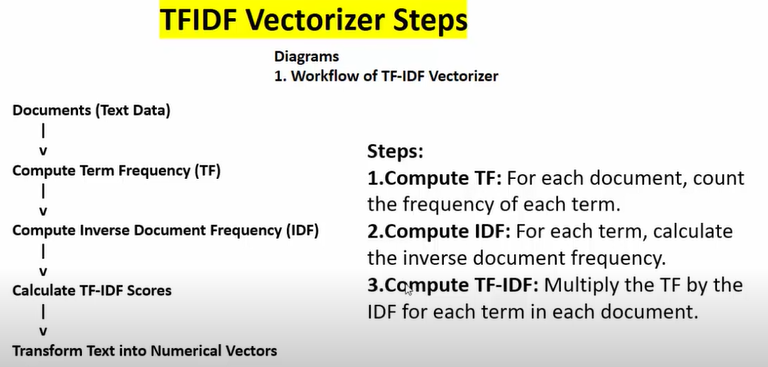

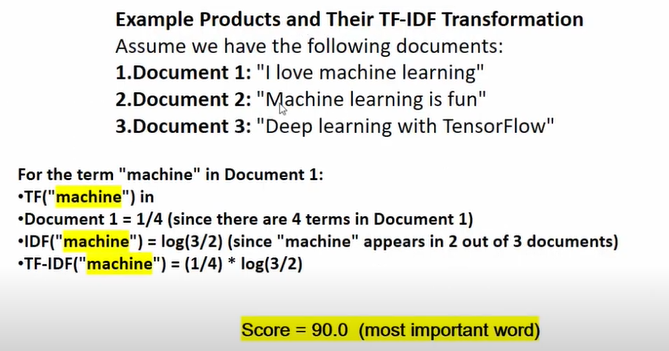

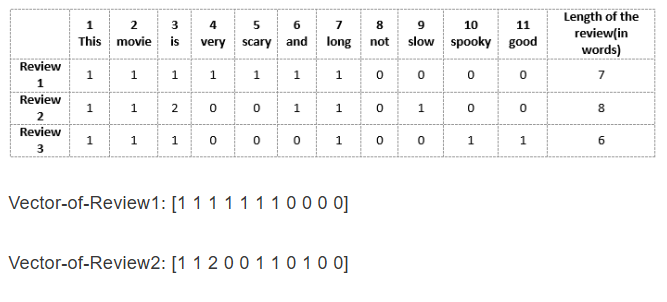

bag of words, n-gram,  word to vector

word to vector based on n no of proprties of semantic meaning representation

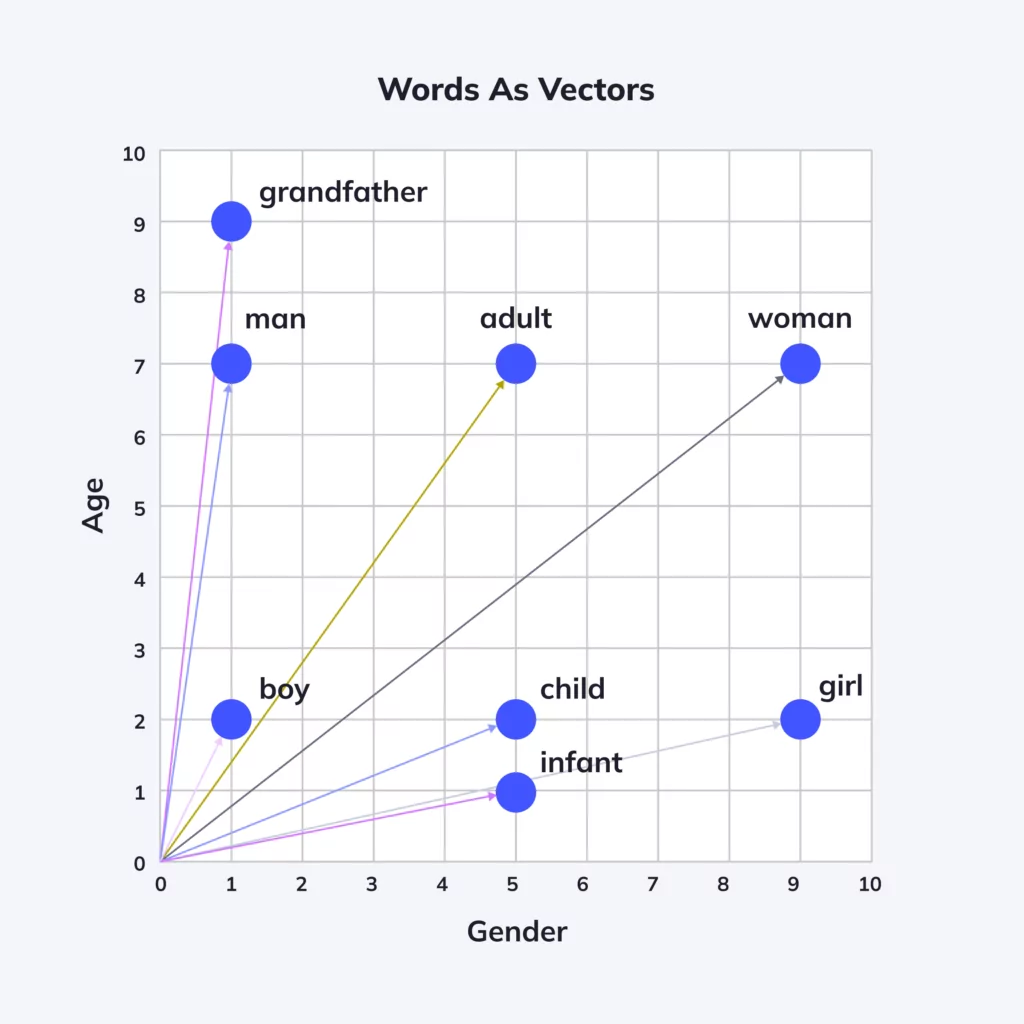

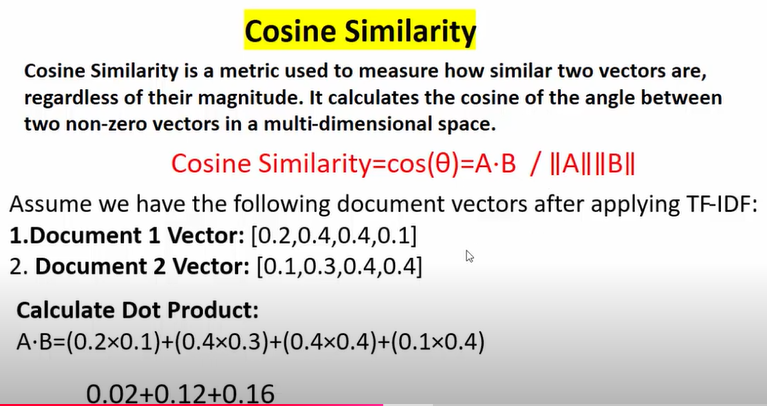

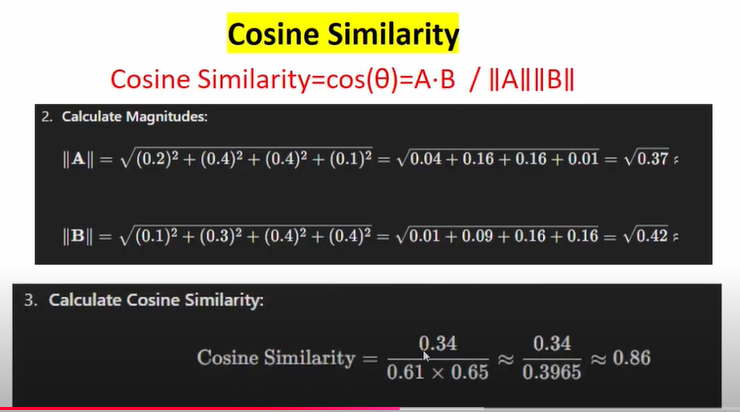

In [63]:
item_name = 'OPI Infinite Shine, Nail Lacquer Nail Polish, Bubble Bath'

In [64]:
train_data[train_data['Name']==item_name]

,ID,ProdID,Rating,ReviewCount,Category,Brand,Name,ImageURL,Description,Tags
0,1.705737e+09,2.0,0.0,0.0,"premium, beauty, premium, makeup, premium, nai...",opi,"OPI Infinite Shine, Nail Lacquer Nail Polish, ...",https://i5.walmartimages.com/asr/0e1f4c51-c1a4...,,"premium, beauty, premium, makeup, premium, nai..."


In [65]:
item_index = train_data[train_data['Name']==item_name].index[0]

In [66]:
item_index

np.int64(0)

In [67]:
cosine_similarities_content[item_index]

array([1.        , 0.00347577, 0.00363226, ..., 0.13535785, 0.31726435,
       0.05689108])

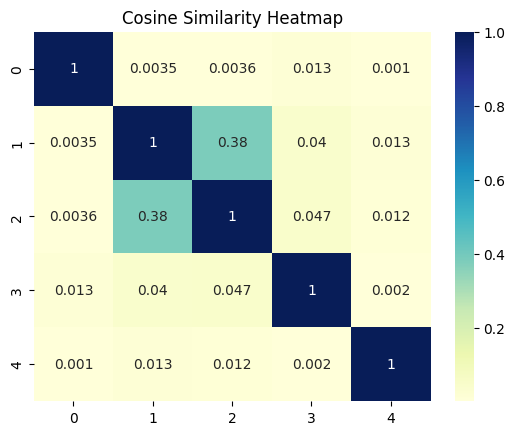

In [71]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create a heatmap
# plt.figure(figsize=(10, 8))
sns.heatmap(cosine_similarities_content[0:5,0:5], annot=True, cmap="YlGnBu")
plt.title("Cosine Similarity Heatmap")

# Show the plot
plt.show()

In [72]:
similar_items = list(enumerate(cosine_similarities_content[item_index]))

In [76]:
similar_items

[(0, np.float64(1.0)),
 (1, np.float64(0.0034757732312750934)),
 (2, np.float64(0.0036322613839184243)),
 (3, np.float64(0.013151377769582695)),
 (4, np.float64(0.0010160210269512565)),
 (5, np.float64(0.006575809352364544)),
 (6, np.float64(0.007328463323503306)),
 (7, np.float64(0.05151153351231968)),
 (8, np.float64(0.011109860476686884)),
 (9, np.float64(0.003151730172379002)),
 (10, np.float64(0.0)),
 (11, np.float64(0.15874576284976777)),
 (12, np.float64(0.040980083610443314)),
 (13, np.float64(0.0030468898686792107)),
 (14, np.float64(0.0)),
 (15, np.float64(0.0059693458494800575)),
 (16, np.float64(0.3398806576145607)),
 (17, np.float64(0.0)),
 (18, np.float64(0.004556103655641239)),
 (19, np.float64(0.0038887588090144405)),
 (20, np.float64(0.008764149884645191)),
 (21, np.float64(0.0)),
 (22, np.float64(0.009458897953602717)),
 (23, np.float64(0.0)),
 (24, np.float64(0.005175585505049849)),
 (25, np.float64(0.0)),
 (26, np.float64(0.007172857177991527)),
 (27, np.float64(0.0

sorted() function: This is a built-in Python function that returns a new sorted list from the elements of any sequence.
key parameter: This is a function that takes a list element and returns a value that will be used for sorting purposes. In this case, we're using a lambda function (lambda x: x[1]) to specify that we want to sort based on the second element of each item (x[1]).
lambda function: This is an anonymous function that takes an item x and returns its second element (x[1]). The lambda function is equivalent to a regular function defined like this:

In [77]:
similar_items = sorted(similar_items, key=lambda x:x[1], reverse=True)
top_similar_items = similar_items[1:10]

In [82]:
top_similar_items[0][1]

np.float64(1.0)

In [78]:
top_similar_items

[(156, np.float64(1.0)),
 (184, np.float64(1.0)),
 (205, np.float64(1.0)),
 (237, np.float64(1.0)),
 (325, np.float64(1.0)),
 (375, np.float64(1.0)),
 (402, np.float64(1.0)),
 (706, np.float64(1.0)),
 (886, np.float64(1.0))]

In [79]:
recommended_items_indics = [x[0] for x in top_similar_items]

In [80]:
recommended_items_indics

[156, 184, 205, 237, 325, 375, 402, 706, 886]

In [83]:
train_data.iloc[recommended_items_indics]

,ID,ProdID,Rating,ReviewCount,Category,Brand,Name,ImageURL,Description,Tags
156,90.0,58.0,0.0,0.0,"premium, beauty, premium, makeup, premium, nai...",opi,OPI Nail Lacquer Polish .5oz/15mL - This Gown ...,https://i5.walmartimages.com/asr/71caed3f-5f83...,,"premium, beauty, premium, makeup, premium, nai..."
184,4133.0,2.0,0.0,0.0,"premium, beauty, premium, makeup, premium, nai...",opi,OPI Nail Gel Polish GelColor .5oz/15mL 3 CT Co...,https://i5.walmartimages.com/asr/2d6f5147-53a8...,,"premium, beauty, premium, makeup, premium, nai..."
205,795649.0,7.0,0.0,0.0,"premium, beauty, premium, makeup, premium, nai...",opi,OPI Nail Lacquer - Dont Bossa Nova Me Around -...,https://i5.walmartimages.com/asr/fd1195d2-8d8d...,,"premium, beauty, premium, makeup, premium, nai..."
237,43.0,4103.0,0.0,5.0,"premium, beauty, premium, makeup, premium, nai...",opi,OPI Infinite Shine 2 Polish - ISL P33 - Alpaca...,https://i5.walmartimages.com/asr/7426eb5c-1690...,,"premium, beauty, premium, makeup, premium, nai..."
325,3.0,4.0,0.0,1.0,"premium, beauty, premium, makeup, premium, nai...",opi,OPI Gel Polish Fall 2019 Scotland Collection G...,https://i5.walmartimages.com/asr/79bbbd9f-9a89...,,"premium, beauty, premium, makeup, premium, nai..."
375,994.0,3402.0,5.0,1.0,"premium, beauty, premium, makeup, premium, nai...",opi,OPI Nail Gel Polish GelColor .5oz/15mL 3 CT Co...,https://i5.walmartimages.com/asr/744e869c-3500...,,"premium, beauty, premium, makeup, premium, nai..."
402,9.0,58.0,4.4,57.0,"premium, beauty, premium, makeup, premium, nai...",opi,"OPI Nail Polish, Strawberry Margarita, 0.5 Fl Oz",https://i5.walmartimages.com/asr/b95676e5-96ab...,,"premium, beauty, premium, makeup, premium, nai..."
706,5400539.0,94.0,5.0,1.0,"premium, beauty, premium, makeup, premium, nai...",opi,OPI Nail Gel Polish GelColor .5oz/15mL 3 CT Co...,https://i5.walmartimages.com/asr/c7ba4815-52f7...,,"premium, beauty, premium, makeup, premium, nai..."
886,36.0,7.0,0.0,0.0,"premium, beauty, premium, makeup, premium, nai...",opi,OPI- Nail Lacquer-GelColor - &quotLiv&quotin t...,https://i5.walmartimages.com/asr/98b4194c-e026...,,"premium, beauty, premium, makeup, premium, nai..."


In [84]:
train_data.iloc[recommended_items_indics][['Name','ReviewCount','Brand']]

,Name,ReviewCount,Brand
156,OPI Nail Lacquer Polish .5oz/15mL - This Gown ...,0.0,opi
184,OPI Nail Gel Polish GelColor .5oz/15mL 3 CT Co...,0.0,opi
205,OPI Nail Lacquer - Dont Bossa Nova Me Around -...,0.0,opi
237,OPI Infinite Shine 2 Polish - ISL P33 - Alpaca...,5.0,opi
325,OPI Gel Polish Fall 2019 Scotland Collection G...,1.0,opi
375,OPI Nail Gel Polish GelColor .5oz/15mL 3 CT Co...,1.0,opi
402,"OPI Nail Polish, Strawberry Margarita, 0.5 Fl Oz",57.0,opi
706,OPI Nail Gel Polish GelColor .5oz/15mL 3 CT Co...,1.0,opi
886,OPI- Nail Lacquer-GelColor - &quotLiv&quotin t...,0.0,opi


Function To Recommend Products for Content Base

In [85]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
train_data['Name']

0       OPI Infinite Shine, Nail Lacquer Nail Polish, ...
1       Nice n Easy Permanent Color, 111 Natural Mediu...
2       Clairol Nice N Easy Permanent Color 7/106A Nat...
3       Kokie Professional Matte Lipstick, Hot Berry, ...
4       Gillette TRAC II Plus Razor Blade Refills, Fit...
                              ...                        
4995    Garden Mint Room Spray (Double Strength), 4 ou...
4996    Garnier Nutrisse Nourishing Hair Color Creme (...
4997    Nail File Electric Drill, 6 in 1 Professional ...
4998    Creed Love In Black Hair And Body Wash 6.8oz/2...
4999                                           Foundation
Name: Name, Length: 5000, dtype: object

In [87]:
train_data['Name'].values

array(['OPI Infinite Shine, Nail Lacquer Nail Polish, Bubble Bath',
       'Nice n Easy Permanent Color, 111 Natural Medium Auburn 1 ea (Pack of 3)',
       'Clairol Nice N Easy Permanent Color 7/106A Natural Dark Neutral Blonde, 1.0 KIT',
       ...,
       'Nail File Electric Drill, 6 in 1 Professional Nail Art Kit For Acrylic Nails Gel Nails Manicure Pedicure Tool,Portable Adjustable Speed Manicure Pedicure Polishi,For Home,Salon',
       'Creed Love In Black Hair And Body Wash 6.8oz/200ml New In Box',
       'Foundation'], dtype=object)

In [89]:
def content_based_recommendations(train_data, item_name, top_n=10):
    # Check if the item name exists in the training data
    if item_name not in train_data['Name'].values:
        print(f"Item '{item_name}' not found in the training data.")
        return pd.DataFrame()

    # Create a TF-IDF vectorizer for item descriptions
    tfidf_vectorizer = TfidfVectorizer(stop_words='english')

    # Apply TF-IDF vectorization to item descriptions
    tfidf_matrix_content = tfidf_vectorizer.fit_transform(train_data['Tags'])

    # Calculate cosine similarity between items based on descriptions
    cosine_similarities_content = cosine_similarity(tfidf_matrix_content, tfidf_matrix_content)

    # Find the index of the item
    item_index = train_data[train_data['Name'] == item_name].index[0]

    # Get the cosine similarity scores for the item
    similar_items = list(enumerate(cosine_similarities_content[item_index]))

    # Sort similar items by similarity score in descending order
    similar_items = sorted(similar_items, key=lambda x: x[1], reverse=True)

    # Get the top N most similar items (excluding the item itself)
    top_similar_items = similar_items[1:top_n+1]

    # Get the indices of the top similar items
    recommended_item_indices = [x[0] for x in top_similar_items]

    # Get the details of the top similar items
    recommended_items_details = train_data.iloc[recommended_item_indices][['Name', 'ReviewCount', 'Brand', 'ImageURL', 'Rating']]

    return recommended_items_details

In [90]:
# Example: Get content-based recommendations for a specific item
item_name = 'OPI Infinite Shine, Nail Lacquer Nail Polish, Bubble Bath'
content_based_rec = content_based_recommendations(train_data, item_name, top_n=8)

content_based_rec

,Name,ReviewCount,Brand,ImageURL,Rating
156,OPI Nail Lacquer Polish .5oz/15mL - This Gown ...,0.0,opi,https://i5.walmartimages.com/asr/71caed3f-5f83...,0.0
184,OPI Nail Gel Polish GelColor .5oz/15mL 3 CT Co...,0.0,opi,https://i5.walmartimages.com/asr/2d6f5147-53a8...,0.0
205,OPI Nail Lacquer - Dont Bossa Nova Me Around -...,0.0,opi,https://i5.walmartimages.com/asr/fd1195d2-8d8d...,0.0
237,OPI Infinite Shine 2 Polish - ISL P33 - Alpaca...,5.0,opi,https://i5.walmartimages.com/asr/7426eb5c-1690...,0.0
325,OPI Gel Polish Fall 2019 Scotland Collection G...,1.0,opi,https://i5.walmartimages.com/asr/79bbbd9f-9a89...,0.0
375,OPI Nail Gel Polish GelColor .5oz/15mL 3 CT Co...,1.0,opi,https://i5.walmartimages.com/asr/744e869c-3500...,5.0
402,"OPI Nail Polish, Strawberry Margarita, 0.5 Fl Oz",57.0,opi,https://i5.walmartimages.com/asr/b95676e5-96ab...,4.4
706,OPI Nail Gel Polish GelColor .5oz/15mL 3 CT Co...,1.0,opi,https://i5.walmartimages.com/asr/c7ba4815-52f7...,5.0


In [91]:
# Example: Get content-based recommendations for a specific item
item_name = 'Kokie Professional Matte Lipstick, Hot Berry, 0.14 fl oz'
content_based_rec = content_based_recommendations(train_data, item_name, top_n=8)

content_based_rec

,Name,ReviewCount,Brand,ImageURL,Rating
3406,"Kokie Professional Matte Lipstick, Firecracker...",0.0,"kokie, cosmetics",https://i5.walmartimages.com/asr/8312221b-ed22...,0.0
546,"Kokie Professional Matte Lipstick, Kiss Me, 0....",0.0,"kokie, cosmetics",https://i5.walmartimages.com/asr/27dd82a2-2b9c...,0.0
2406,"L.A. Colors Matte Lipstick, Tender Matte",3.0,colors,https://i5.walmartimages.com/asr/271264fb-e8c3...,3.7
4050,Kokie Professional Lip Poudre Liquid Matte Liq...,7.0,"kokie, cosmetics",https://i5.walmartimages.com/asr/fdd7498c-319f...,3.4
4084,e.l.f. Mad for Matte 4 Piece Lip Color Set,0.0,cosmetics,https://i5.walmartimages.com/asr/e2d30304-edc9...,0.0
1559,"LOreal Paris Colour Riche Matte Lip Liner, Mat...",495.0,paris,https://i5.walmartimages.com/asr/baf97085-7231...,4.4
2873,Kokie Professional Lip Poudre Liquid Matte Liq...,7.0,"kokie, cosmetics",https://i5.walmartimages.com/asr/31c99d9b-ea11...,3.4
3023,Be Matte Lipstick - Pink,2.0,"city, color",https://i5.walmartimages.com/asr/4425a13e-085f...,3.0


Collaborative Filtering (User Item Similarity)

ID - user id, and prod id cosine similarity

In [92]:
user_item_matrix = train_data.pivot_table(index='ID', columns='ProdID', values='Rating',aggfunc='mean').fillna(0).astype(int)

In [93]:
user_item_matrix

ProdID,0.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00,6.000000e+00,7.000000e+00,8.000000e+00,9.000000e+00,...,1.007940e+42,1.007940e+42,1.008730e+42,1.030521e+42,1.030521e+42,1.030521e+42,1.076430e+42,3.002240e+42,5.002240e+42,5.005509e+42
ID,,,,,,,,,,,,,,,,,,,,,
0.000000e+00,2,1,2,1,1,0,2,1,1,1,...,0,0,0,0,0,0,5,0,0,0
1.000000e+00,1,0,2,2,0,2,3,2,0,2,...,0,4,0,0,5,0,0,0,0,0
2.000000e+00,1,1,3,1,2,1,0,2,1,1,...,0,3,0,0,0,0,0,0,0,4
3.000000e+00,1,1,1,2,0,3,1,0,0,3,...,0,0,0,0,0,0,0,0,0,0
4.000000e+00,3,0,2,1,1,1,0,2,1,3,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9.967409e+13,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6.094514e+14,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3.007694e+17,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


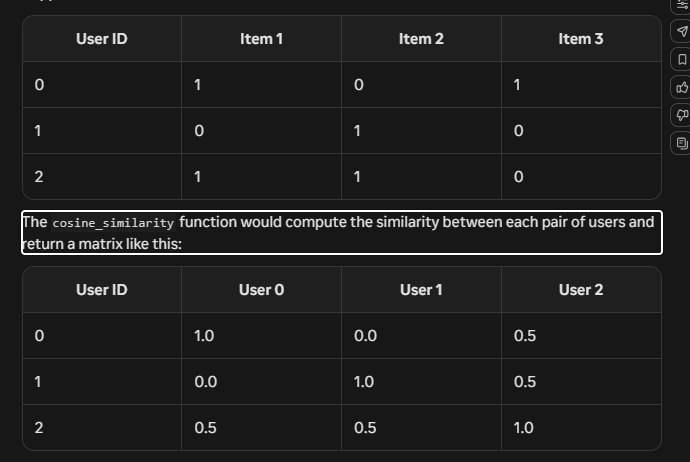

In [94]:
user_similarity = cosine_similarity(user_item_matrix)

In [95]:
user_similarity

array([[1.        , 0.08328508, 0.08776176, ..., 0.        , 0.03388371,
        0.        ],
       [0.08328508, 1.        , 0.09334828, ..., 0.        , 0.        ,
        0.        ],
       [0.08776176, 0.09334828, 1.        , ..., 0.        , 0.0417756 ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.03388371, 0.        , 0.0417756 , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [97]:
target_user_id = 4
target_user_index = user_item_matrix.index.get_loc(target_user_id)

In [98]:
target_user_index

4

In [99]:
user_similarities = user_similarity[target_user_index]

In [100]:
user_similarities

array([0.0675362 , 0.0920999 , 0.044717  , ..., 0.        , 0.03691067,
       0.        ])

In [101]:
user_similarities.argsort()

array([1686, 1720, 1709, ...,  702,   84,    4])

In [ ]:
user_similarities.argsort()[::-1] # reverse order /// start , end and step

array([   4,   84,  702, ..., 1709, 1720, 1686])

In [102]:
similar_user_indices = user_similarities.argsort()[::-1][1:]

In [103]:
similar_user_indices

array([  84,  702, 1552, ..., 1709, 1720, 1686])

In [ ]:
user_item_matrix.iloc[4] # product id and rating

ProdID
0.000000e+00    3
1.000000e+00    0
2.000000e+00    2
3.000000e+00    1
4.000000e+00    1
               ..
1.030521e+42    0
1.076430e+42    0
3.002240e+42    0
5.002240e+42    0
5.005509e+42    0
Name: 4.0, Length: 1697, dtype: int64

In [107]:
similar_user_indices

array([  84,  702, 1552, ..., 1709, 1720, 1686])

In [108]:
target_user_index

4

In [112]:
user_item_matrix

ProdID,0.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00,6.000000e+00,7.000000e+00,8.000000e+00,9.000000e+00,...,1.007940e+42,1.007940e+42,1.008730e+42,1.030521e+42,1.030521e+42,1.030521e+42,1.076430e+42,3.002240e+42,5.002240e+42,5.005509e+42
ID,,,,,,,,,,,,,,,,,,,,,
0.000000e+00,2,1,2,1,1,0,2,1,1,1,...,0,0,0,0,0,0,5,0,0,0
1.000000e+00,1,0,2,2,0,2,3,2,0,2,...,0,4,0,0,5,0,0,0,0,0
2.000000e+00,1,1,3,1,2,1,0,2,1,1,...,0,3,0,0,0,0,0,0,0,4
3.000000e+00,1,1,1,2,0,3,1,0,0,3,...,0,0,0,0,0,0,0,0,0,0
4.000000e+00,3,0,2,1,1,1,0,2,1,3,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9.967409e+13,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6.094514e+14,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3.007694e+17,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [116]:
rated_by_similar_user = user_item_matrix.iloc[84] # product id and rating

In [119]:
rated_by_similar_user

ProdID
0.000000e+00    0
1.000000e+00    0
2.000000e+00    4
3.000000e+00    0
4.000000e+00    0
               ..
1.030521e+42    0
1.076430e+42    0
3.002240e+42    0
5.002240e+42    0
5.005509e+42    0
Name: 84.0, Length: 1697, dtype: int64

In [118]:
rated_by_similar_user==0

ProdID
0.000000e+00     True
1.000000e+00     True
2.000000e+00    False
3.000000e+00     True
4.000000e+00     True
                ...  
1.030521e+42     True
1.076430e+42     True
3.002240e+42     True
5.002240e+42     True
5.005509e+42     True
Name: 84.0, Length: 1697, dtype: bool

In [120]:
user_item_matrix.iloc[4]

ProdID
0.000000e+00    3
1.000000e+00    0
2.000000e+00    2
3.000000e+00    1
4.000000e+00    1
               ..
1.030521e+42    0
1.076430e+42    0
3.002240e+42    0
5.002240e+42    0
5.005509e+42    0
Name: 4.0, Length: 1697, dtype: int64

In [121]:
user_item_matrix.iloc[4]==0

ProdID
0.000000e+00    False
1.000000e+00     True
2.000000e+00    False
3.000000e+00    False
4.000000e+00    False
                ...  
1.030521e+42     True
1.076430e+42     True
3.002240e+42     True
5.002240e+42     True
5.005509e+42     True
Name: 4.0, Length: 1697, dtype: bool

In [146]:
#  find items rated by similar user but not by target user
(rated_by_similar_user!=0)

ProdID
0.000000e+00    False
1.000000e+00    False
2.000000e+00     True
3.000000e+00    False
4.000000e+00    False
                ...  
1.030521e+42    False
1.076430e+42    False
3.002240e+42    False
5.002240e+42    False
5.005509e+42    False
Name: 84.0, Length: 1697, dtype: bool

In [145]:
# find items rated by similar user but not by target user
(rated_by_similar_user!=0) & (user_item_matrix.iloc[4]==0)

ProdID
0.000000e+00    False
1.000000e+00    False
2.000000e+00    False
3.000000e+00    False
4.000000e+00    False
                ...  
1.030521e+42    False
1.076430e+42    False
3.002240e+42    False
5.002240e+42    False
5.005509e+42    False
Length: 1697, dtype: bool

In [139]:
not_rated_by_target_user = (rated_by_similar_user==0) & (user_item_matrix.iloc[4]==0)

In [140]:
not_rated_by_target_user

ProdID
0.000000e+00    False
1.000000e+00     True
2.000000e+00    False
3.000000e+00    False
4.000000e+00    False
                ...  
1.030521e+42     True
1.076430e+42     True
3.002240e+42     True
5.002240e+42     True
5.005509e+42     True
Length: 1697, dtype: bool

In [141]:
len((rated_by_similar_user!=0) & (user_item_matrix.iloc[4]==0))

1697

In [142]:
(rated_by_similar_user==0) & (user_item_matrix.iloc[4]==0)

ProdID
0.000000e+00    False
1.000000e+00     True
2.000000e+00    False
3.000000e+00    False
4.000000e+00    False
                ...  
1.030521e+42     True
1.076430e+42     True
3.002240e+42     True
5.002240e+42     True
5.005509e+42     True
Length: 1697, dtype: bool

In [143]:
user_item_matrix.columns

Index([                   0.0,                    1.0,                    2.0,
                          3.0,                    4.0,                    5.0,
                          6.0,                    7.0,                    8.0,
                          9.0,
       ...
       1.0079400442823793e+42, 1.0079400522358793e+42, 1.0087300000937795e+42,
       1.0305210043067793e+42, 1.0305210044194794e+42, 1.0305210046716793e+42,
       1.0764302122699794e+42,  3.002240064065679e+42,  5.002240000559679e+42,
       5.0055086003853795e+42],
      dtype='float64', name='ProdID', length=1697)

In [144]:
user_item_matrix.columns[not_rated_by_target_user]

Index([                   1.0,                    6.0,                   10.0,
                         11.0,                   12.0,                   13.0,
                         14.0,                   15.0,                   16.0,
                         17.0,
       ...
       1.0055086004876794e+42, 1.0079400442823793e+42, 1.0087300000937795e+42,
       1.0305210043067793e+42, 1.0305210044194794e+42, 1.0305210046716793e+42,
       1.0764302122699794e+42,  3.002240064065679e+42,  5.002240000559679e+42,
       5.0055086003853795e+42],
      dtype='float64', name='ProdID', length=1640)

In [147]:
user_item_matrix.columns[not_rated_by_target_user][:10]

Index([1.0, 6.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0], dtype='float64', name='ProdID')

In [150]:
recommend_items = []

for user_index in similar_user_indices:
    # get ratings of similar user
    rated_by_similar_user = user_item_matrix.iloc[user_index]
    # find items rated by similar user but not by target user
    not_rated_by_target_user = (rated_by_similar_user==0) & (user_item_matrix.iloc[target_user_index]==0)
    # add top 10 items to recommendation list
    recommend_items.extend(user_item_matrix.columns[not_rated_by_target_user][:10])

recommended_items_details = train_data[train_data['ProdID'].isin(recommend_items)][['Name','ReviewCount','Brand','ImageURL','Rating']]

In [152]:
recommend_items[:10]


[1.0, 6.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0]

In [153]:
recommended_items_details[:10]

,Name,ReviewCount,Brand,ImageURL,Rating
15,Clairol Natural Instincts Demi-Permanent Hair ...,2935.0,clairol,https://i5.walmartimages.com/asr/00a6e54a-e431...,3.7
33,"DenTek Kids Fun Flossers, Removes Food & Plaqu...",3.0,dentek,https://i5.walmartimages.com/asr/de6e52eb-6e18...,0.0
61,"COVERGIRL Exhibitionist Cream Lipstick, 395 Da...",713.0,covergirl,https://i5.walmartimages.com/asr/95076ec0-ffbd...,4.3
64,Neutrogena SkinClearing Oil-Free Liquid Founda...,741.0,neutrogena,https://i5.walmartimages.com/asr/fd4d78d8-310a...,4.2
69,Design Essentials Natural Coconut & Monoi Curl...,1.0,"design, essentials",https://i5.walmartimages.com/asr/ff2dba1d-0c02...,5.0
78,"Paul Sebastian Fine Cologne Spray, Cologne for...",28.0,"paul, sebastian",https://i5.walmartimages.com/asr/03d08a07-18d7...,4.8
85,"BioAstin Hawaiian Astaxanthin, Vegan, 12mg, 75 Ct",3.0,bioastin,https://i5.walmartimages.com/asr/6da9e238-b19e...,5.0
92,"Bytewise Organic Moringa Leaf Powder, 12 Oz",0.0,bytewise,https://i5.walmartimages.com/asr/076f2b3f-fdc3...,0.0
94,Ag Hair Cosmetics Ultradynamics Extra-Firm Fin...,0.0,"ag, hair",https://i5.walmartimages.com/asr/5d217d98-a385...,0.0
108,OPI Nail Dipping Powder Perfection Combo - Liq...,1.0,opi,https://i5.walmartimages.com/asr/ef1607ee-5bdb...,3.0


Function That Recommend Items

In [154]:
def collaborative_filtering_recommendations(train_data, target_user_id, top_n=10):
    # Create the user-item matrix
    user_item_matrix = train_data.pivot_table(index='ID', columns='ProdID', values='Rating', aggfunc='mean').fillna(0)

    # Calculate the user similarity matrix using cosine similarity
    user_similarity = cosine_similarity(user_item_matrix)

    # Find the index of the target user in the matrix
    target_user_index = user_item_matrix.index.get_loc(target_user_id)

    # Get the similarity scores for the target user
    user_similarities = user_similarity[target_user_index]

    # Sort the users by similarity in descending order (excluding the target user)
    similar_users_indices = user_similarities.argsort()[::-1][1:]

    # Generate recommendations based on similar users
    recommended_items = []

    for user_index in similar_users_indices:
        # Get items rated by the similar user but not by the target user
        rated_by_similar_user = user_item_matrix.iloc[user_index]
        not_rated_by_target_user = (rated_by_similar_user == 0) & (user_item_matrix.iloc[target_user_index] == 0)

        # Extract the item IDs of recommended items
        recommended_items.extend(user_item_matrix.columns[not_rated_by_target_user][:top_n])

    # Get the details of recommended items
    recommended_items_details = train_data[train_data['ProdID'].isin(recommended_items)][['Name', 'ReviewCount', 'Brand', 'ImageURL', 'Rating']]

    return recommended_items_details.head(10)

In [155]:
# Example usage
target_user_id = 4
top_n = 10
collaborative_filtering_rec = collaborative_filtering_recommendations(train_data, target_user_id)
print(f"Top {top_n} recommendations for User {target_user_id}:")
collaborative_filtering_rec

Top 10 recommendations for User 4:


,Name,ReviewCount,Brand,ImageURL,Rating
61,"COVERGIRL Exhibitionist Cream Lipstick, 395 Da...",713.0,covergirl,https://i5.walmartimages.com/asr/95076ec0-ffbd...,4.3
85,"BioAstin Hawaiian Astaxanthin, Vegan, 12mg, 75 Ct",3.0,bioastin,https://i5.walmartimages.com/asr/6da9e238-b19e...,5.0
86,LOreal Paris Feria Multi-Faceted Shimmering Pe...,2144.0,paris,https://i5.walmartimages.com/asr/c229026a-2b75...,3.1
108,OPI Nail Dipping Powder Perfection Combo - Liq...,1.0,opi,https://i5.walmartimages.com/asr/ef1607ee-5bdb...,3.0
144,Covidien Curity Maternity Pad Heavy 4.33&quot ...,0.0,covidien,https://i5.walmartimages.com/asr/e4e38217-ed43...,0.0
155,"Crest 3D White Brilliance Mouthwash, Alcohol F...",63.0,crest,https://i5.walmartimages.com/asr/1fcc5525-9ae3...,0.0
174,COVERGIRL Outlast All-Day Moisturizing Lip Col...,36.0,covergirl,https://i5.walmartimages.com/asr/4479896f-c6c4...,0.0
193,"Revlon ColorStay Skinny Liquid Liner, 304 Gree...",70.0,revlon,https://i5.walmartimages.com/asr/aa3b20a6-3d6d...,4.5
212,"Comvita Certified UMF 20+ Manuka Honey, Raw & ...",0.0,comvita,https://i5.walmartimages.com/asr/3cdc1498-a2ac...,0.0
241,"Ahava Mens Mineral Hand Cream, 3.4 Oz",0.0,ahava,https://i5.walmartimages.com/asr/f74e4bb7-47d3...,0.0


Hybrid Recommendations

In [156]:
# Hybrid Recommendations (Combine Content-Based and Collaborative Filtering)
def hybrid_recommendations(train_data,target_user_id, item_name, top_n=10):
    # Get content-based recommendations
    content_based_rec = content_based_recommendations(train_data,item_name, top_n)

    # Get collaborative filtering recommendations
    collaborative_filtering_rec = collaborative_filtering_recommendations(train_data,target_user_id, top_n)
    
    # Merge and deduplicate the recommendations
    hybrid_rec = pd.concat([content_based_rec, collaborative_filtering_rec]).drop_duplicates() # axis=0
    
    return hybrid_rec.head(10)

In [157]:
# Example usage: Get hybrid recommendations for a specific user and item
target_user_id = 4 # Change this to the user_id you want recommendations for
item_name = "OPI Nail Lacquer Polish .5oz/15mL - This Gown Needs A Crown NL U11"  # Change this to the item name
hybrid_rec = hybrid_recommendations(train_data,target_user_id, item_name, top_n=10)

print(f"Top 10 Hybrid Recommendations for User {target_user_id} and Item '{item_name}':")
hybrid_rec

Top 10 Hybrid Recommendations for User 4 and Item 'OPI Nail Lacquer Polish .5oz/15mL - This Gown Needs A Crown NL U11':


,Name,ReviewCount,Brand,ImageURL,Rating
156,OPI Nail Lacquer Polish .5oz/15mL - This Gown ...,0.0,opi,https://i5.walmartimages.com/asr/71caed3f-5f83...,0.0
184,OPI Nail Gel Polish GelColor .5oz/15mL 3 CT Co...,0.0,opi,https://i5.walmartimages.com/asr/2d6f5147-53a8...,0.0
205,OPI Nail Lacquer - Dont Bossa Nova Me Around -...,0.0,opi,https://i5.walmartimages.com/asr/fd1195d2-8d8d...,0.0
237,OPI Infinite Shine 2 Polish - ISL P33 - Alpaca...,5.0,opi,https://i5.walmartimages.com/asr/7426eb5c-1690...,0.0
325,OPI Gel Polish Fall 2019 Scotland Collection G...,1.0,opi,https://i5.walmartimages.com/asr/79bbbd9f-9a89...,0.0
375,OPI Nail Gel Polish GelColor .5oz/15mL 3 CT Co...,1.0,opi,https://i5.walmartimages.com/asr/744e869c-3500...,5.0
402,"OPI Nail Polish, Strawberry Margarita, 0.5 Fl Oz",57.0,opi,https://i5.walmartimages.com/asr/b95676e5-96ab...,4.4
706,OPI Nail Gel Polish GelColor .5oz/15mL 3 CT Co...,1.0,opi,https://i5.walmartimages.com/asr/c7ba4815-52f7...,5.0
886,OPI- Nail Lacquer-GelColor - &quotLiv&quotin t...,0.0,opi,https://i5.walmartimages.com/asr/98b4194c-e026...,0.0
1042,"OPI GelColor Gel Nail Polish, Dulce De Leche, ...",1.0,opi,https://i5.walmartimages.com/asr/c1b2c370-b2d2...,0.0
